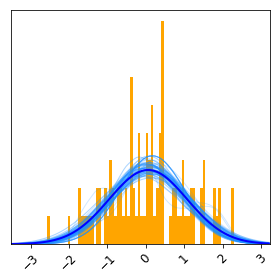

In [1]:
# Standard modules
import numpy as np
import sys

# Import suftware 
sys.path.append('../../')
import suftware as sw

# Generate datas
np.random.seed(0)
data = np.random.randn(100)

# simple test
sw.Density(data).plot() 

In [2]:
# grid

# Should fail
sw.Density(data, grid=5, should_fail=True)
sw.Density(data, grid=set(np.linspace(-3,3,100)), should_fail=True)
sw.Density(data, grid=np.linspace(-3,3,5), should_fail=True)
sw.Density(data, grid=np.linspace(-3,3,1001), should_fail=True)
sw.Density(data, grid=np.linspace(-1E-6,1E-6,100), should_fail=True)
sw.Density(data, grid=np.linspace(-1E6,1E6,100), should_fail=True)


# Should work
sw.Density(data, grid=np.linspace(-3,3,100), should_fail=False)
sw.Density(data, grid=np.linspace(-3,3,100).T, should_fail=False)
sw.Density(data, grid=np.matrix(np.linspace(-3,3,100)), should_fail=False)
sw.Density(data, grid=np.matrix(np.linspace(-3,3,100).T), should_fail=False)
sw.Density(data, grid=list(np.linspace(-3,3,100)), should_fail=False)
sw.Density(data, grid=np.linspace(-3,3,6), should_fail=False)
sw.Density(data, grid=np.linspace(-3,3,100), should_fail=False)
sw.Density(data, grid=np.linspace(-3,3,1000), should_fail=False)

Error, as expected: type(grid) = <class 'int'>; must be a list or np.ndarray
Error, as expected: type(grid) = <class 'set'>; must be a list or np.ndarray
Error, as expected: len(grid) = 5; must have 6 <= len(grid) <= 1000.
Error, as expected: len(grid) = 1001; must have 6 <= len(grid) <= 1000.
Error, as expected: Histogram has 0 nonempty bins; must be > 3.
Error, as expected: Histogram has 2 nonempty bins; must be > 3.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.


In [3]:
# bounding_box

# Invalid input
sw.Density(data, bounding_box={-6, 6}, should_fail=True)
sw.Density(data, bounding_box=6, should_fail=True)
sw.Density(data, bounding_box=[6], should_fail=True)
sw.Density(data, bounding_box=[-6, 0, 6], should_fail=True)
sw.Density(data, bounding_box=['-6', '6'], should_fail=True)
sw.Density(data, bounding_box=[6, 6], should_fail=True)
sw.Density(data, bounding_box='[-6, 6]', should_fail=True)

# Valid input
sw.Density(data, bounding_box=[-6, 6], should_fail=False)
sw.Density(data, bounding_box=(-6, 6), should_fail=False)
sw.Density(data, bounding_box=np.array([-6, 6]), should_fail=False)
sw.Density(data, bounding_box=[-.1, .1], should_fail=False)
sw.Density(data, bounding_box=[-10, 10], should_fail=False)

# To few filled bins
sw.Density(data, bounding_box=[-1E-6, 1E-6], should_fail=True)
sw.Density(data, bounding_box=[-1E6, 1E6], should_fail=True)
sw.Density(data, bounding_box=[10, 20], should_fail=True)

Error, as expected: type(bounding_box) = <class 'set'>; must be one of (<class 'list'>, <class 'tuple'>, <class 'numpy.ndarray'>)
Error, as expected: type(bounding_box) = <class 'int'>; must be one of (<class 'list'>, <class 'tuple'>, <class 'numpy.ndarray'>)
Error, as expected: len(bounding_box) = 1; must be 2
Error, as expected: len(bounding_box) = 3; must be 2
Error, as expected: bounding_box = ['-6', '6']; entries must be numbers
Error, as expected: bounding_box = [6, 6]; entries must be sorted
Error, as expected: type(bounding_box) = <class 'str'>; must be one of (<class 'list'>, <class 'tuple'>, <class 'numpy.ndarray'>)
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Error, as expected: Histogram has 0 nonempty bins; must be > 3.
Error, as expected: Histogram has 2 nonempty bins; must be > 3.
Error, as expected: Histogram has 0 nonempty bins; must be > 3.


In [4]:
# grid_spacing

# Invalid input
sw.Density(data, grid_spacing=0, should_fail=True)
sw.Density(data, grid_spacing=0.0, should_fail=True)
sw.Density(data, grid_spacing=-0.1, should_fail=True)
sw.Density(data, grid_spacing='0.1', should_fail=True)
sw.Density(data, grid_spacing=[0.1], should_fail=True)

# Insane values
sw.Density(data, grid_spacing=0.0001, should_fail=True)
sw.Density(data, grid_spacing=1000.0, should_fail=True)

# Should work
sw.Density(data, grid_spacing=None, should_fail=False)
sw.Density(data, grid_spacing=0.02, should_fail=False)
sw.Density(data, grid_spacing=0.1, should_fail=False)
sw.Density(data, grid_spacing=0.5, should_fail=False)

Error, as expected: grid_spacing = 0.000000; must be > 0.
Error, as expected: grid_spacing = 0.000000; must be > 0.
Error, as expected: grid_spacing = -0.100000; must be > 0.
Error, as expected: type(grid_spacing) = <class 'str'>; must be a number
Error, as expected: type(grid_spacing) = <class 'list'>; must be a number
Error, as expected: Using grid_spacing = 0.000100 produces num_grid_points = 67518, which is too big. Increase grid_spacing or do not set.
Error, as expected: Using grid_spacing = 1000.000000 produces num_grid_points = 0, which is too small. Reduce grid_spacing or do not set.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.


In [5]:
# num_grid_points

# Fails
sw.Density(data, num_grid_points=-10, should_fail=True)
sw.Density(data, num_grid_points=-1, should_fail=True)
sw.Density(data, num_grid_points=0, should_fail=True)
sw.Density(data, num_grid_points=1, should_fail=True)
sw.Density(data, num_grid_points=2, should_fail=True)
sw.Density(data, num_grid_points=3, should_fail=True)
sw.Density(data, num_grid_points=4, should_fail=True)
sw.Density(data, num_grid_points=5, should_fail=True)
sw.Density(data, num_grid_points=1001, should_fail=True)

# Works
sw.Density(data, num_grid_points=6, should_fail=False)
sw.Density(data, num_grid_points=100, should_fail=False)
sw.Density(data, num_grid_points=1000, should_fail=False)


Error, as expected: num_grid_points = -10; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = -1; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 0; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 1; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 2; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 3; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 4; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 5; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 1001; must have 6 <= num_grid_poitns <= 1000.
Success, as expected.
Success, as expected.
Success, as expected.
